## Implementasi Algoritma Haar Cascade Sebagai Detektor Wajah

Dicoding

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.rcParams['figure.figsize'] = [15,30]

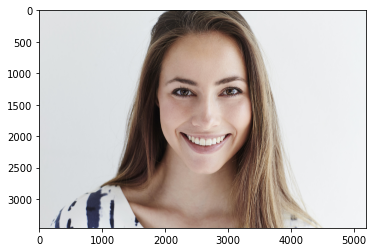

In [ ]:
path = 'pict.jpg'
img = cv2.imread(path)

# Merubah gambar menjadi RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [ ]:
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml" -O haarcascade_frontalface_default.xml

--2021-10-16 17:28:42--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2021-10-16 17:28:42 (18.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

path = ('pict.jpg')
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

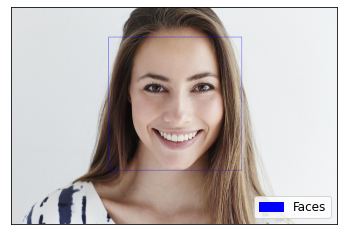

In [ ]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor = 1.3,
    minNeighbors = 5
)

for (x, y, w, h) in faces:
  img = cv2.rectangle(
      img,
      (x, y),
      (x+w, y+h),
      (255, 0, 0),
      3
  )

  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]

plt.xticks([])
plt.yticks([])

face_patch = mpatches.Patch(color='blue', label='Faces')

plt.legend(handles=[face_patch],
           loc='lower right', fontsize=12)

imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# Pendeteksi mata
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml" -O haarcascade_eye.xml
 
# Pendeteksi senyum
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml" -O haarcascade_smile.xml

--2021-10-16 17:34:13--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.03s   

2021-10-16 17:34:14 (9.59 MB/s) - ‘haarcascade_eye.xml’ saved [341406/341406]

--2021-10-16 17:34:14--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

path = 'pict.jpg'
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

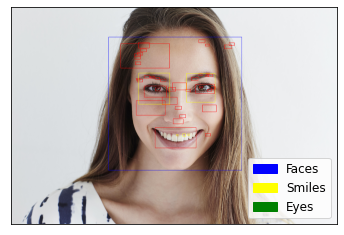

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
  img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 3)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  
  smiles = smile_cascade.detectMultiScale(roi_gray, minNeighbors=20)
  for (sx, sy, sw, sh) in smiles:
    cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0,0,255), 3)

  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 255), 3)

plt.xticks([])
plt.yticks([])

face_patch = mpatches.Patch(color='blue', label='Faces')
smile_patch = mpatches.Patch(color='yellow', label='Smiles')
eye_patch = mpatches.Patch(color='green', label='Eyes')

plt.legend(handles=[face_patch, smile_patch, eye_patch],
           loc = 'lower right', fontsize=12)

imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))